# Two-Stage Global Fit

1.	Generate n number of replicas from whichever local fitting method we conclude is optimal for each kinematic set of which we have m, thus producing a nxm matrix for each Compton Form Factor.
2.	Define and compile a neural network, or other model form, with some set of as yet undetermined hyperparameters.
3.	Train n copies of that model on each row of that matrix, meaning each model sees m data points.  Repeat this for each Compton Form Factor.
4.	To interpolate a value of F for a novel kinematic set, feed that kinematic set into each model, producing n predictions of each CFF.  The mean of that n-sized vector would be the point estimate of our CFF, and the standard deviation would be our error.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler

import utilities as uts

In [4]:
from TVA1_UU import TVA1_UU #modified bhdvcs file

## Setup

In [9]:
len(np.unique(df['#Set']))

342

In [5]:
numSets = 342
numReplicas = 100

bhdvcs = TVA1_UU()

df = pd.read_csv("dvcs_May21.csv")
data = uts.DvcsData(df)

localFits = np.fromfile('replicas100.txt')
localFits = localFits.reshape(numSets, numReplicas, 3)

## Define model

In [163]:
kinematics = tf.keras.Input(shape=(4))
x = tf.keras.layers.Dense(20, activation="relu")(kinematics)
x = tf.keras.layers.Dense(20, activation="relu")(x)
outputs = tf.keras.layers.Dense(3)(x)

globalModel = tf.keras.Model(inputs=kinematics, outputs=outputs, name="GlobalModel")

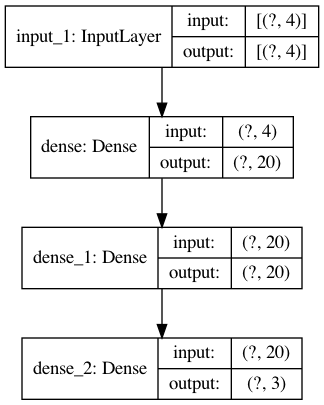

In [12]:
tf.keras.utils.plot_model(globalModel, "cffs.png", show_shapes=True)

In [37]:
X = data.Kinematics.loc[np.array(range(numSets))*45, :].reset_index(drop=True)

#y = np.array(data.CFFs.loc[np.array(range(numSets))*45, :].reset_index(drop=True))

## Exploration

In [112]:
y = localFits.flatten()

In [114]:
y.sort()

In [126]:
cff = 0
meds = []
stds = []
for i in range(localFits.shape[0]):
    print('Setnum:', str(i))
    print("Median: ", np.median(localFits[i, :, cff]))
    print("Mean: ", np.mean(localFits[i, :, cff]))
    print("Std: ", np.std(localFits[i, :, cff]))
    print()
    meds.append(np.median(localFits[i, :, cff]))
    stds.append(np.std(localFits[i, :, cff]))

Setnum: 0
Median:  0.7307201082027434
Mean:  0.7276791396813758
Std:  0.6434222774932389

Setnum: 1
Median:  1.5652034150409464
Mean:  1.4599589979149223
Std:  1.551444061248842

Setnum: 2
Median:  2.260601138063252
Mean:  1.884434262147328
Std:  5.415225311636633

Setnum: 3
Median:  0.9148705805162882
Mean:  0.5945542612964155
Std:  5.094539862610202

Setnum: 4
Median:  89.55370762661342
Mean:  84.64503419013448
Std:  305.4617301600201

Setnum: 5
Median:  1.4205903583081896
Mean:  1.4875529662820353
Std:  0.796892276131952

Setnum: 6
Median:  3.4743212564239103
Mean:  2.717164676097692
Std:  15.630176761504822

Setnum: 7
Median:  1.9752566611121058
Mean:  1.8176095737684397
Std:  6.114042149218907

Setnum: 8
Median:  1.780996348531404
Mean:  1.692792349960894
Std:  1.1269670990584837

Setnum: 9
Median:  1.735440997013185
Mean:  1.5133136696430702
Std:  0.967174755234347

Setnum: 10
Median:  -0.30358192461750483
Mean:  -0.8995135193572529
Std:  9.382510201590426

Setnum: 11
Median:  1.

Median:  1.0266032448281779
Mean:  0.9807597854495621
Std:  1.2930574114901314

Setnum: 173
Median:  1.3234661214435381
Mean:  1.32563332294376
Std:  0.3954321199799644

Setnum: 174
Median:  1.5094644688740158
Mean:  1.315452053072313
Std:  1.8625092744643297

Setnum: 175
Median:  0.297035477952095
Mean:  0.29811964349229525
Std:  0.34457962028035294

Setnum: 176
Median:  0.7584220685297524
Mean:  0.6055649263275457
Std:  1.002340470588422

Setnum: 177
Median:  0.6670152242986054
Mean:  0.6566644297927772
Std:  0.44487573430250305

Setnum: 178
Median:  1.3909887848459848
Mean:  1.3445521998069392
Std:  1.121458347111827

Setnum: 179
Median:  317.5254111466637
Mean:  269.25938823297236
Std:  978.0999493543275

Setnum: 180
Median:  1.7495296502858793
Mean:  1.4809529539642972
Std:  2.552914055842112

Setnum: 181
Median:  0.47748733550729333
Mean:  0.5279646379370615
Std:  0.9457700740280429

Setnum: 182
Median:  0.31076238379980925
Mean:  0.315094702912042
Std:  0.14410825501155308

Setn

Setnum: 337
Median:  1.4103433108609602
Mean:  1.408239735741961
Std:  0.18548522242341597

Setnum: 338
Median:  0.9016748490304598
Mean:  0.861731659943527
Std:  4.795240456620513

Setnum: 339
Median:  0.8356098813978724
Mean:  0.8545924885029682
Std:  1.2466784720615136

Setnum: 340
Median:  0.9232527403596849
Mean:  0.9158871063292696
Std:  0.8696332312068944

Setnum: 341
Median:  1.221017010410327
Mean:  1.175325270961231
Std:  0.36179014090098227



In [151]:
p25, p75 = np.percentile(stds, [25, 75])
iqr = p75-p25
upper = np.median(stds) + 3*iqr

In [152]:
upper

6.218425095559536

In [154]:
np.where(np.array(stds) > 10)[0]

array([  4,   6,  17,  21,  57,  87,  88,  99, 179, 247, 279])

In [158]:
normal_idxs = np.where(np.array(stds) < upper)[0]

In [167]:
Xsubset = X.loc[normal_idxs, :]
localFitssubset = localFits[normal_idxs, :, :]

# Produce results

In [168]:
rescaler = MinMaxScaler()

rescaler = rescaler.fit(Xsubset)
X_rescaled = rescaler.transform(Xsubset)

In [169]:
globalModel.compile(optimizer=tf.keras.optimizers.Adam(.1), loss=tf.keras.losses.MeanSquaredError())
orig_weights = globalModel.get_weights()

## Actual Results

In [176]:
valid_idxs = np.random.choice(list(range(numSets)), size=int(len(normal_idxs)*.2))
train_idxs = np.delete(list(range(len(normal_idxs))), valid_idxs)

<ipython-input-176-5739da6ad0cb>:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  train_idxs = np.delete(list(range(len(normal_idxs))), valid_idxs)


In [177]:
valid_x = X_rescaled[valid_idxs, :]
train_x = X_rescaled[train_idxs, :]

IndexError: index 324 is out of bounds for axis 0 with size 323

In [178]:
def produceResults(model, X, localFits, orig_weights, numSets, numReplicas, folder_name, epochs=250):
    '''
    Essentially LOO cross-val with y-values being generated from seperate local fit
    
    globalModel: a tensorflow neural network model
    X: standardized kinematic variables
    orig_weights: the original weights from when the model was created (used to reset model after it has been trained)
    numSets: the number of kinematic sets
    numReplicas: the number of replicas
    
    returns: np array of cff predictions of shape (numSets, numReplicas, numCFFs)
    '''
    
    for rep in range(numReplicas):
        train_y = localFits[:, rep, :]

        model.set_weights(orig_weights)
        model.fit(X, train_y, epochs=epochs, verbose=0)
        model.save(folder_name + '/' + 'model' + str(rep) + '.h5')

In [179]:
results = produceResults(globalModel, X_rescaled, localFitssubset, orig_weights, numSets, numReplicas, 'M4mods')

# Global Plot

In [83]:
localFits[:, :, 0].mean(axis=1).mean()

2.0798904469419015

In [84]:
localFits[:, :, 1].mean(axis=1).mean()

2.7138976989988923

In [85]:
localFits[:, :, 2].mean(axis=1).mean()

2.0968531732600413

In [180]:
def graph_localFits(localFits, X, which_kin, cff_num, ylim=None):
    if ylim:
        plt.ylim(ylim)
    plt.plot(X[which_kin], localFits[:, :, cff_num].mean(axis=1), 'o')
    plt.xlabel(which_kin)
    plt.ylabel(['ReH', 'ReE', 'ReHtilde'][cff_num])

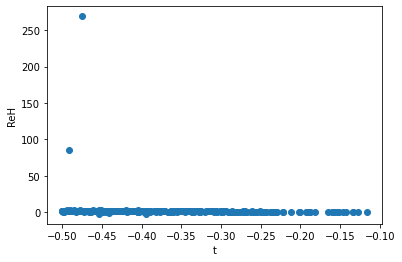

In [192]:
graph_localFits(localFits, X, 't', 0)

## Results

## New

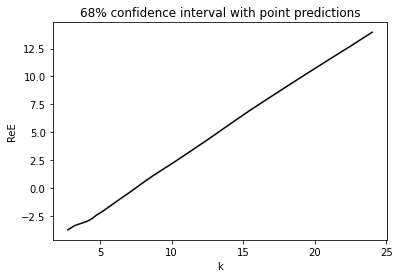

In [186]:
uts.c_int_plot('M4mods', data, 'k', 1)

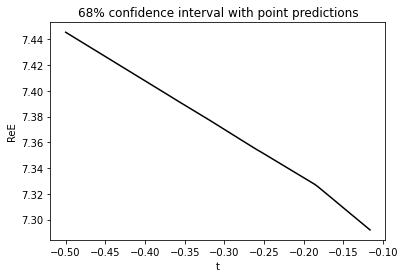

In [187]:
uts.c_int_plot('M4mods', data, 't', 1)

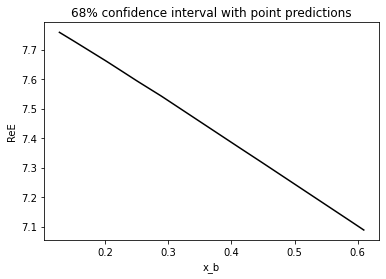

In [188]:
uts.c_int_plot('M4mods', data, 'x_b', 1)

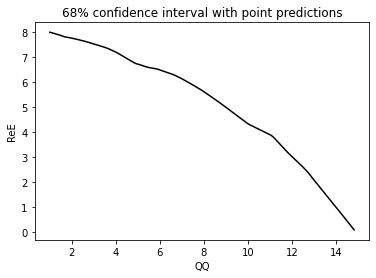

In [189]:
uts.c_int_plot('M4mods', data, 'QQ', 1)

### ReH

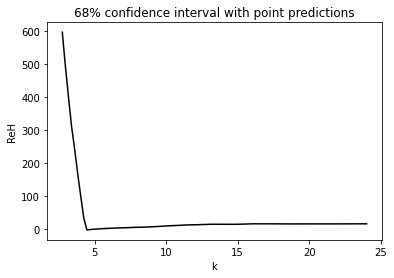

In [29]:
uts.c_int_plot('M4mods', data, 'k', 0)

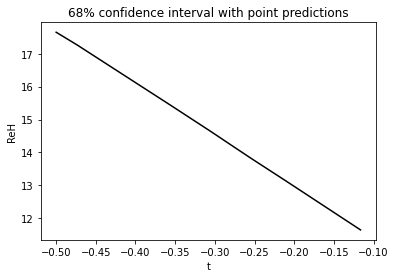

In [30]:
uts.c_int_plot('M4mods', data, 't', 0)

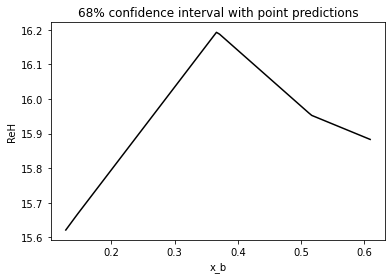

In [31]:
uts.c_int_plot('M4mods', data, 'x_b', 0)

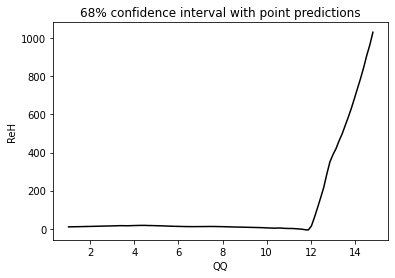

In [34]:
uts.c_int_plot('M4mods', data, 'QQ', 0)

In [89]:
rescaler.data_min_

array([ 2.75    ,  1.01332 ,  0.127697, -0.499923])

### ReE

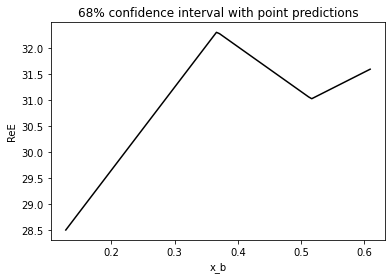

In [32]:
uts.c_int_plot('M4mods', data, 'x_b', 1)

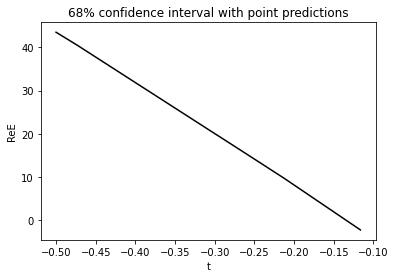

In [76]:
uts.c_int_plot('M4mods', data, 't', 1)

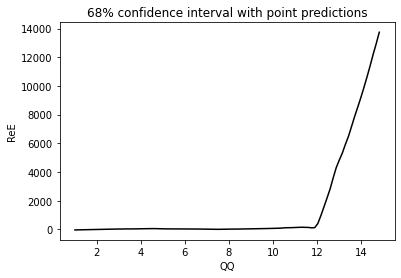

In [78]:
uts.c_int_plot('M4mods', data, 'QQ', 1)

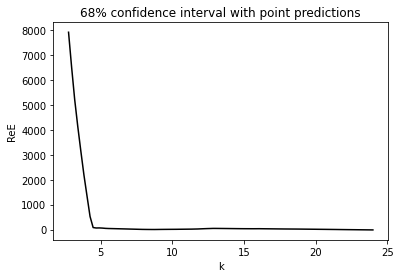

In [79]:
uts.c_int_plot('M4mods', data, 'k', 1)

### ReHtilde

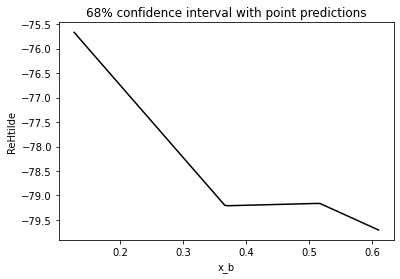

In [33]:
uts.c_int_plot('M4mods', data, 'x_b', 2)

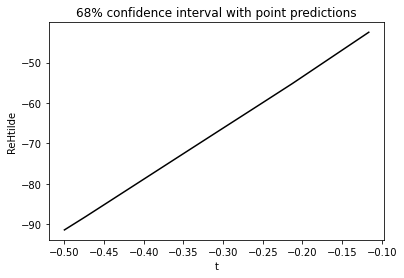

In [80]:
uts.c_int_plot('M4mods', data, 't', 2)

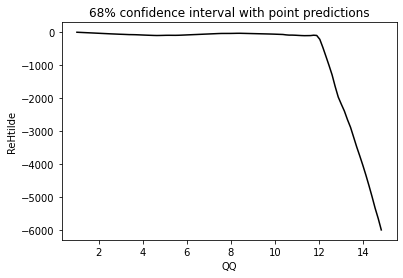

In [81]:
uts.c_int_plot('M4mods', data, 'QQ', 2)

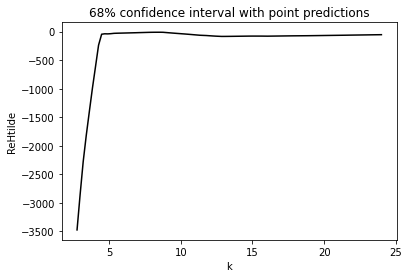

In [82]:
uts.c_int_plot('M4mods', data, 'k', 2)

# Actual Functions

$$ReH = 5t^2 + 2x_b^2$$

$$ReE = 4.5t + -1.5x_b^2$$

$$ReHtilde = -5.5t + 4.5x_b$$